In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

from pygraphon.estimators import USVT, NBDsmooth, LG

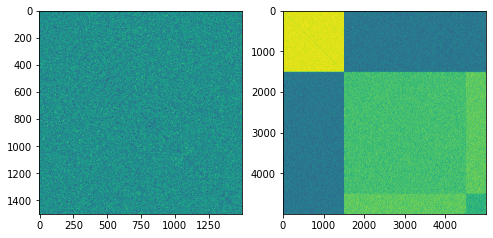

In [3]:
n = 500
graph = nx.to_numpy_array(nx.erdos_renyi_graph(3 * n, 0.5))
sbm_graph = nx.to_numpy_array(nx.stochastic_block_model(
    [n*3,n*6,n], [[0.95, 0.4, 0.4], [0.4, 0.7, 0.75], [0.4, 0.75, 0.65]], 
))
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(graph)
ax[1].imshow(sbm_graph)
plt.show()


In [4]:
def test_estimator(estimator, graph, sbm_graph):
    estimator.fit(graph)
    edge_connectivity = estimator.get_edge_connectivity()
    print(f"ER(0.5) estimated rho: {edge_connectivity.sum() / (3 * n) ** 2}")
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].set_title("ER(0.5)")
    ax[0].imshow(edge_connectivity)
    estimator.fit(sbm_graph)
    edge_connectivity = estimator.get_edge_connectivity()
    ax[1].imshow(edge_connectivity)
    ax[1].set_title("SBM graph")
    plt.show()
    

In [5]:
estimator = LG(K = 3)

In [6]:
degrees = sbm_graph.sum(axis = 0)/ (sbm_graph.shape[0]-1)
indices_sorted = np.argsort(degrees)
degrees_sorted = degrees[indices_sorted]

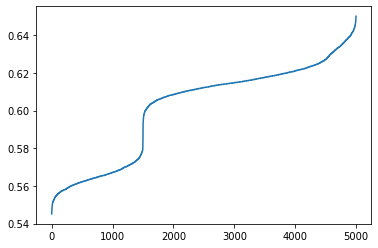

In [7]:
plt.plot(degrees_sorted)

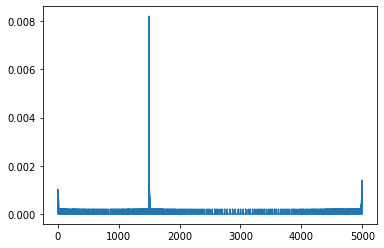

In [8]:
plt.plot(np.diff(degrees_sorted))

In [22]:
np.argsort(np.diff(degrees_sorted))[::-1][0:10]

array([1499, 1497, 1498, 4995, 1501,    1,    4, 1504, 4996,    2])

In [23]:
np.sort(np.diff(degrees_sorted))[::-1][0:10]

array([0.00820164, 0.00240048, 0.00160032, 0.00140028, 0.00140028,
       0.0010002 , 0.0010002 , 0.0010002 , 0.00080016, 0.00080016])

In [9]:
ind = np.argpartition(np.diff(degrees_sorted), -2)[-2:]

In [15]:
ind

array([1497, 1499])

In [10]:
indices_sorted[ind]

array([258, 817])

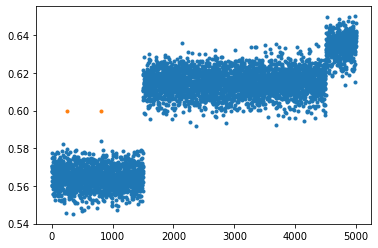

In [11]:
plt.plot(degrees, marker = ".", ls = "")
plt.plot(indices_sorted[ind], [0.6,0.6], marker = ".", ls = "")
plt.show()

In [12]:
blocks = estimator._find_biggest_degreee_gap(sbm_graph)

[1497 1499]
[0, 1497, 1499, 4999]


In [18]:
blocks[1]

array([258, 178])

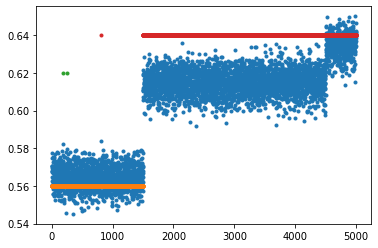

In [19]:
plt.plot(degrees, marker = ".", ls = "")
plt.plot(blocks[0], [0.56]*len(blocks[0]), marker = ".", ls = "")
plt.plot(blocks[1], [0.62]*len(blocks[1]), marker = ".", ls = "")
plt.plot(blocks[2], [0.64]*len(blocks[2]), marker = ".", ls = "")
plt.show()

ER(0.5) estimated rho: 0.49919593170485604


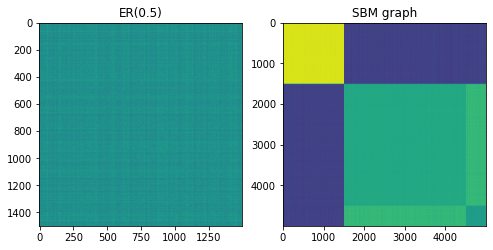

In [13]:
test_estimator(NBDsmooth(), graph, sbm_graph)

ER(0.5) estimated rho: 0.49919842213253623


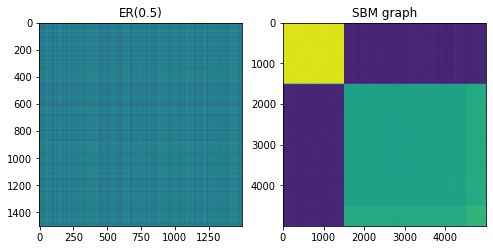

In [14]:
test_estimator(USVT(), graph, sbm_graph)